In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [4]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Water_Pollution_Index'].quantile(0.25)
Q3 = df['Water_Pollution_Index'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = df[(df['Water_Pollution_Index'] < lower_bound) | (df['Water_Pollution_Index'] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Country, Year, Air_Pollution_Index, Water_Pollution_Index, Soil_Pollution_Index, Industrial_Waste (in tons), Energy_Recovered (in GWh), CO2_Emissions (in MT), Renewable_Energy (%), Plastic_Waste_Produced (in tons), Energy_Consumption_Per_Capita (in MWh), Population (in millions), GDP_Per_Capita (in USD)]
Index: []


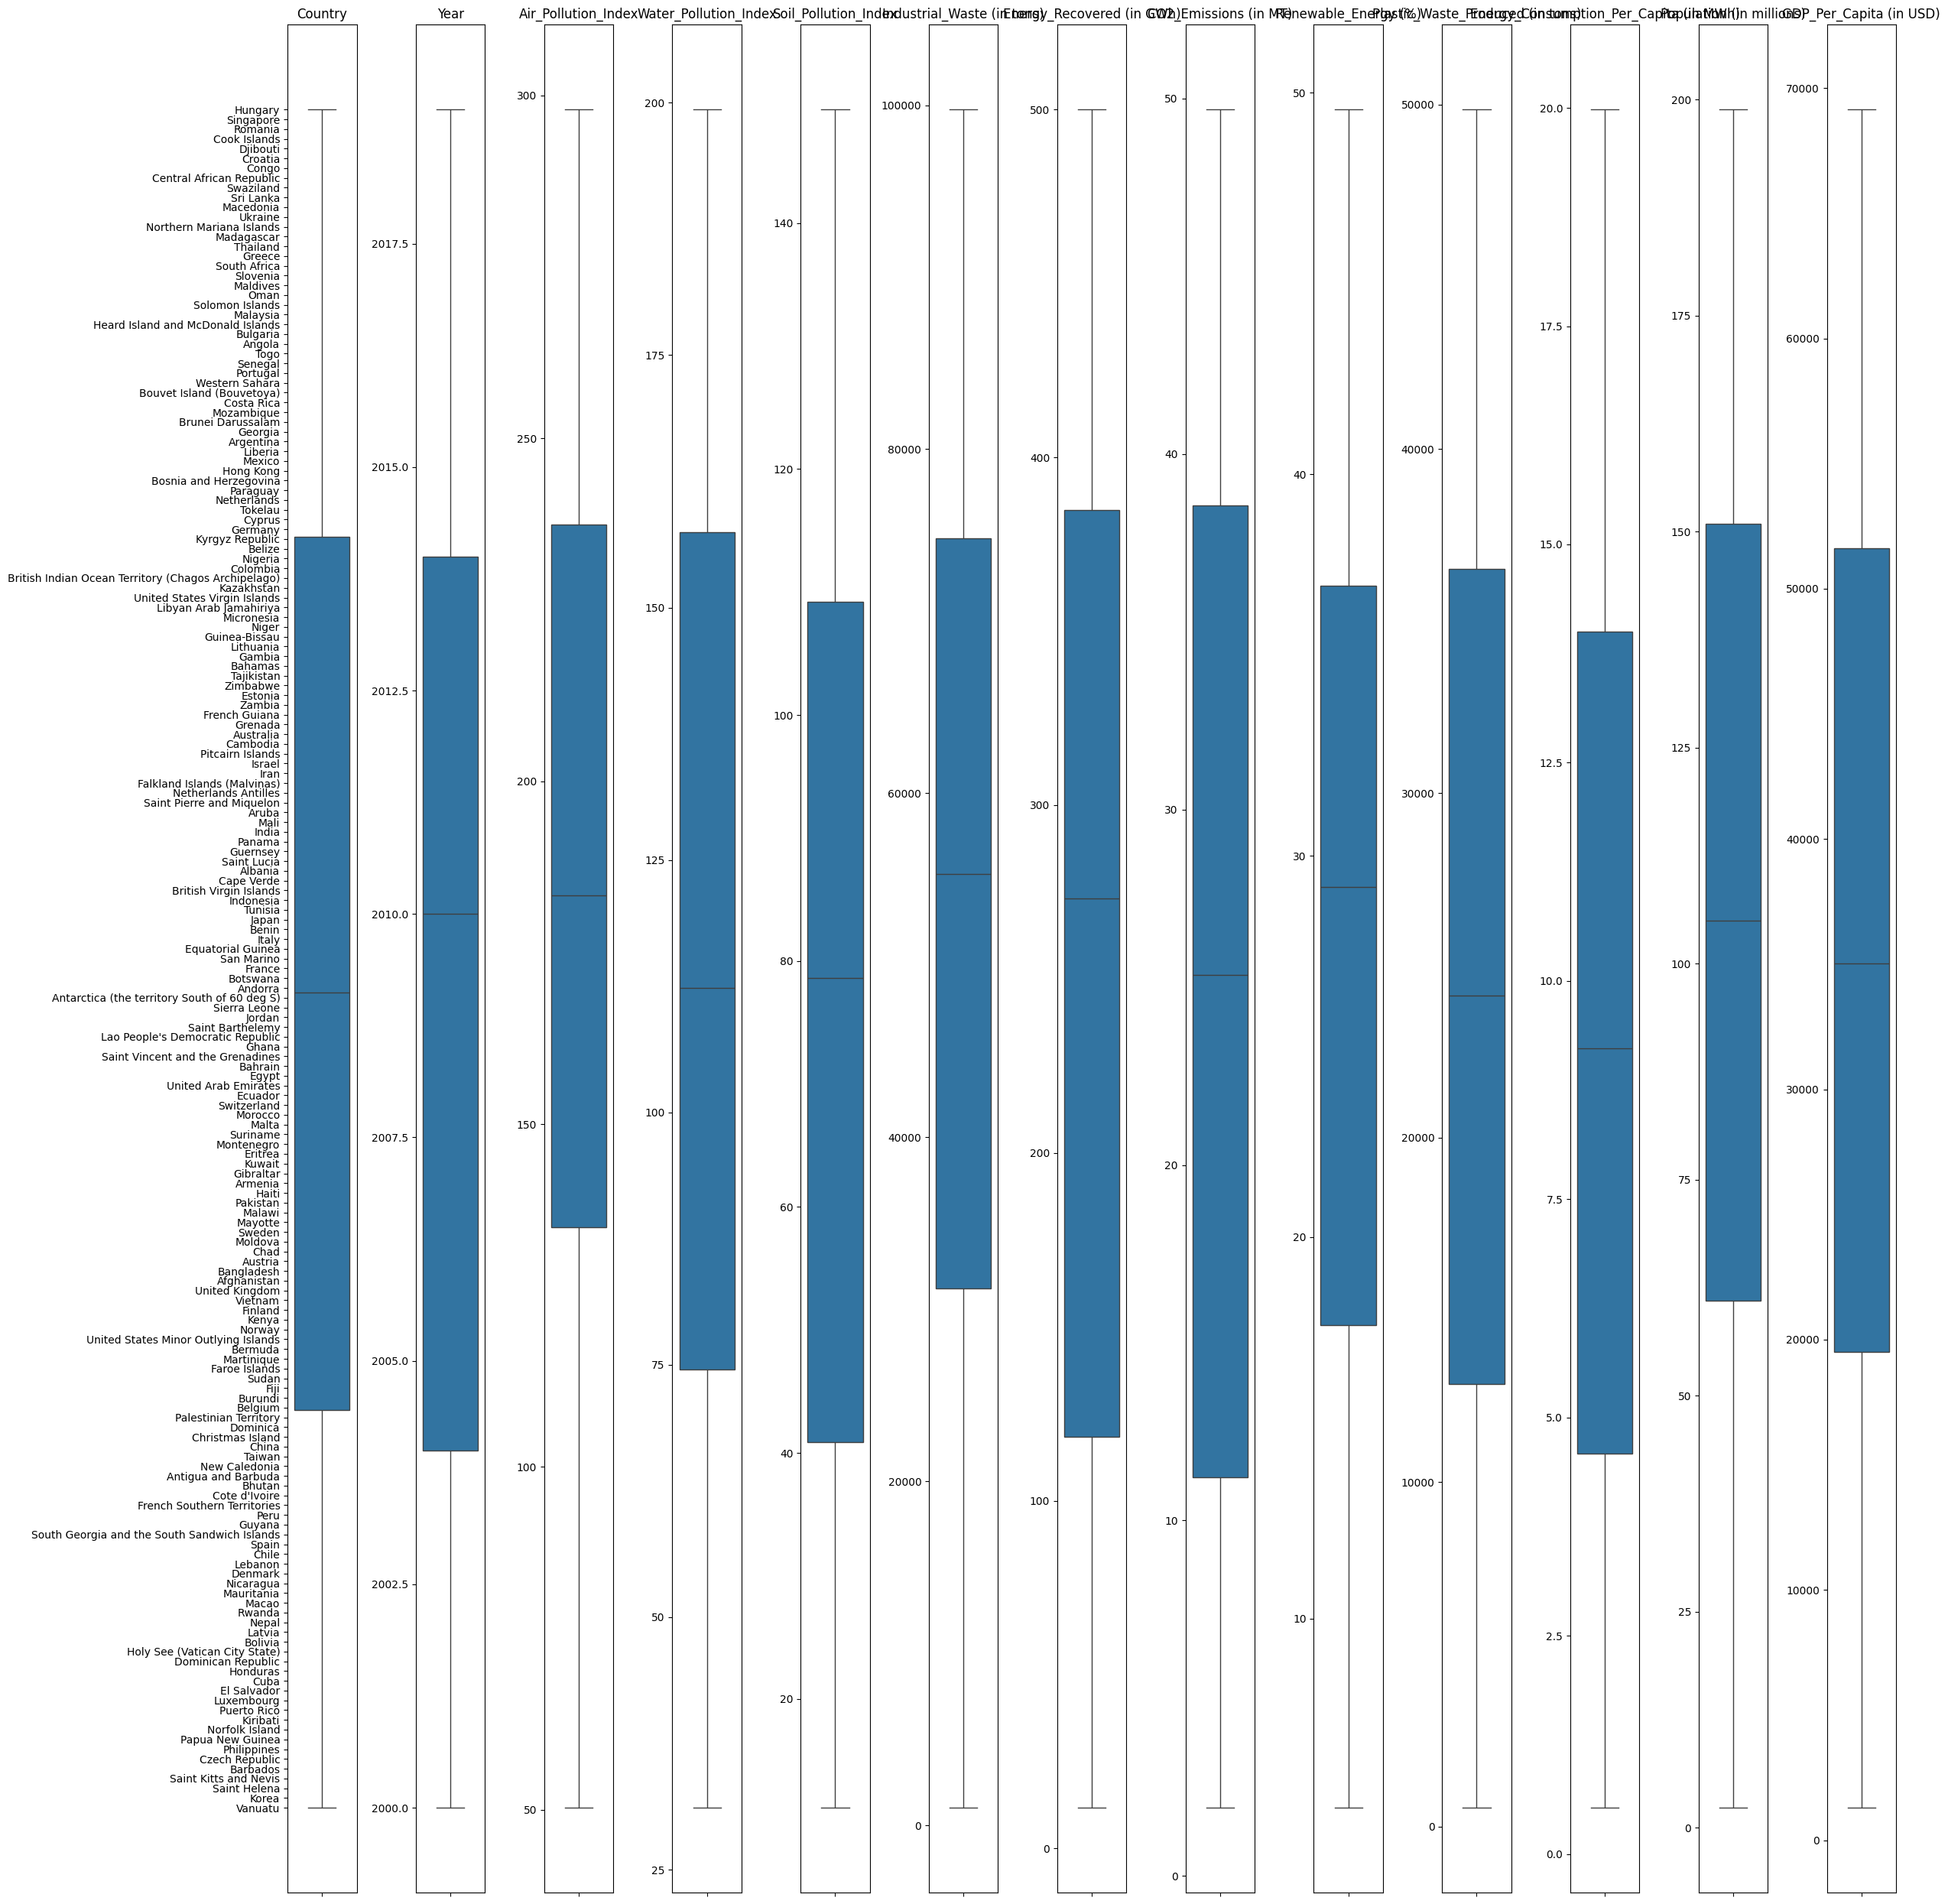

In [5]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 25))

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [6]:
df.sort_values(by='Population (in millions)', inplace=True)

In [7]:
df_new = df.drop(columns=['Country', 'Year'])
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new)
normalized_df = pd.DataFrame(normalized_data, columns=df_new.columns)

<Axes: >

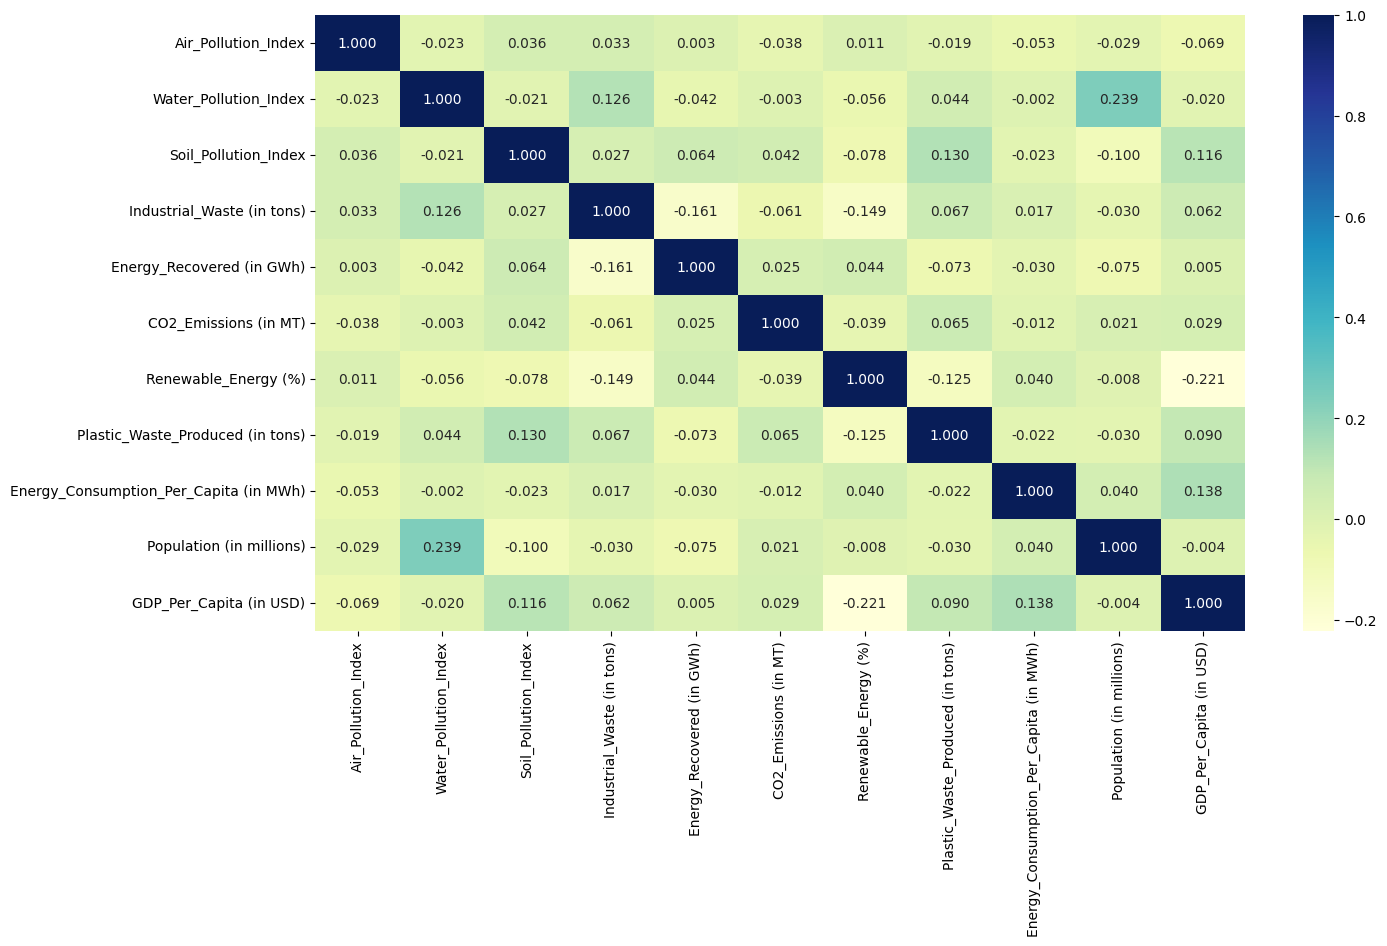

In [8]:
plt.figure(figsize=(15, 8)) 
sns.heatmap(normalized_df.corr(), annot=True, cmap='YlGnBu', fmt=".3f")

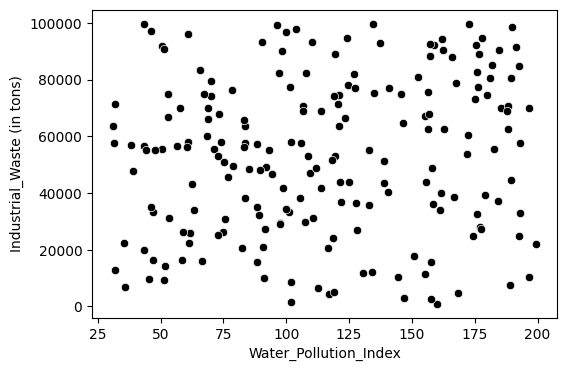

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Water_Pollution_Index'],y=df['Industrial_Waste (in tons)'], color='black')
plt.show()

In [10]:
normalized_df['Year'] = df['Year'].values
normalized_df['Country'] = df['Country'].values

In [11]:
x= normalized_df['Water_Pollution_Index']+normalized_df['Air_Pollution_Index']+normalized_df['Soil_Pollution_Index']
y= normalized_df['CO2_Emissions (in MT)']
z= normalized_df['Industrial_Waste (in tons)']
p= normalized_df['Population (in millions)']
q= normalized_df['Renewable_Energy (%)']
print(x.corr(y), 'CO2_Emissions')
print(x.corr(z), 'Industrial_Waste')
print(x.corr(p), 'population')
print(x.corr(q), 'Renewable_Energy')
print(normalized_df['Plastic_Waste_Produced (in tons)'].corr(x), 'Plastic_Waste_Produced v/s Pollution Index')

0.0017853303399134996 CO2_Emissions
0.10797764404925328 Industrial_Waste
0.06415928498641145 population
-0.07251559189030143 Renewable_Energy
0.09253671244285885 Plastic_Waste_Produced v/s Pollution Index


In [12]:
print(normalized_df['Soil_Pollution_Index'].corr(normalized_df['CO2_Emissions (in MT)'], method='spearman'))
print(normalized_df['Soil_Pollution_Index'].corr(normalized_df['CO2_Emissions (in MT)']))

0.039139787204404954
0.041913031861913225


In [13]:
X = df[['Air_Pollution_Index', 'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)']]
y = df['Energy_Recovered (in GWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.016986293785499318
MSE: 22131.470629862637
RMSE: 148.76649700071127
MAE: 131.37641409760727


In [15]:
df['Pollution_Score'] = (df['Air_Pollution_Index'] + df['CO2_Emissions (in MT)'])
df['Pollution_Level'] = pd.qcut(df['Pollution_Score'], q=3, labels=['Low','Medium','High'])

In [16]:
df.columns

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)', 'Pollution_Score', 'Pollution_Level'],
      dtype='object')

Accuracy: 0.975
Precision: 0.976923076923077
Recall: 0.975
F1 Score: 0.9750370370370369
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      0.93      0.96        14
      Medium       0.92      1.00      0.96        12

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



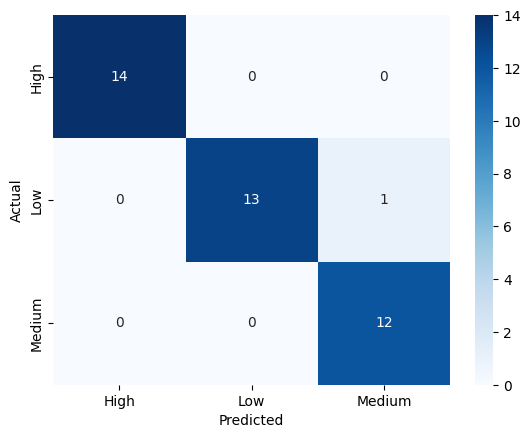

In [17]:
y = df['Pollution_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.55
              precision    recall  f1-score   support

        High       0.42      0.36      0.38        14
         Low       0.86      0.86      0.86        14
      Medium       0.36      0.42      0.38        12

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.54        40
weighted avg       0.55      0.55      0.55        40



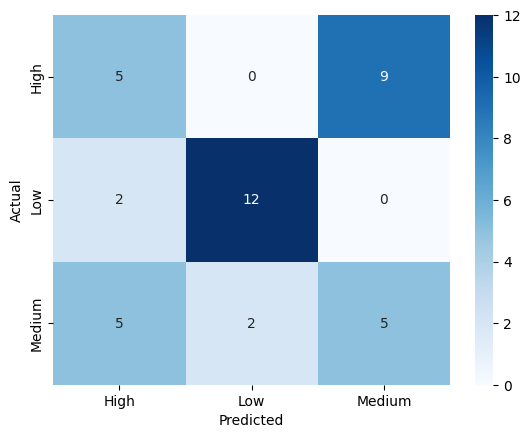

In [18]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best K: 9 with accuracy: 0.325
              precision    recall  f1-score   support

        High       0.37      0.50      0.42        14
         Low       0.42      0.36      0.38        14
      Medium       0.11      0.08      0.10        12

    accuracy                           0.33        40
   macro avg       0.30      0.31      0.30        40
weighted avg       0.31      0.33      0.31        40



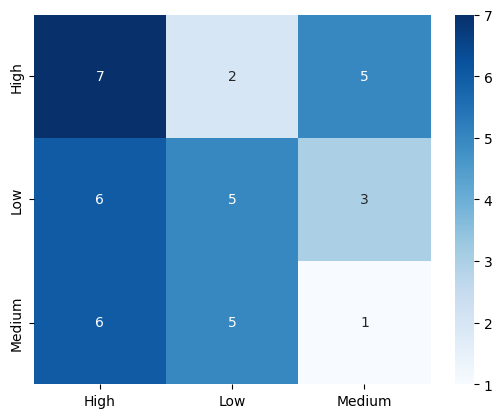

In [19]:
# Try different values of k
best_k, best_acc = 0, 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    if acc > best_acc:
        best_k, best_acc = k, acc

print("Best K:", best_k, "with accuracy:", best_acc)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.show()

              precision    recall  f1-score   support

        High       1.00      0.86      0.92        14
         Low       1.00      1.00      1.00        14
      Medium       0.86      1.00      0.92        12

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



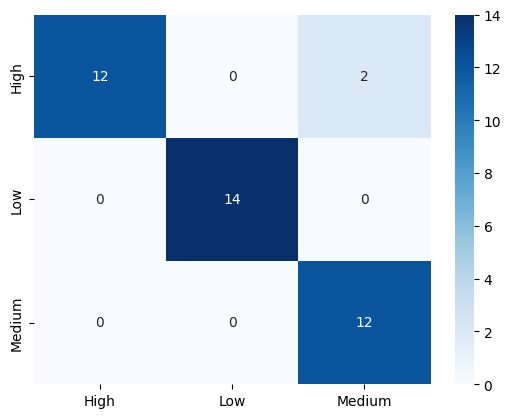

In [20]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=21)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.show()


In [21]:
df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 191 to 129
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Country                                 200 non-null    object  
 1   Year                                    200 non-null    int64   
 2   Air_Pollution_Index                     200 non-null    float64 
 3   Water_Pollution_Index                   200 non-null    float64 
 4   Soil_Pollution_Index                    200 non-null    float64 
 5   Industrial_Waste (in tons)              200 non-null    float64 
 6   Energy_Recovered (in GWh)               200 non-null    float64 
 7   CO2_Emissions (in MT)                   200 non-null    float64 
 8   Renewable_Energy (%)                    200 non-null    float64 
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64 
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null 

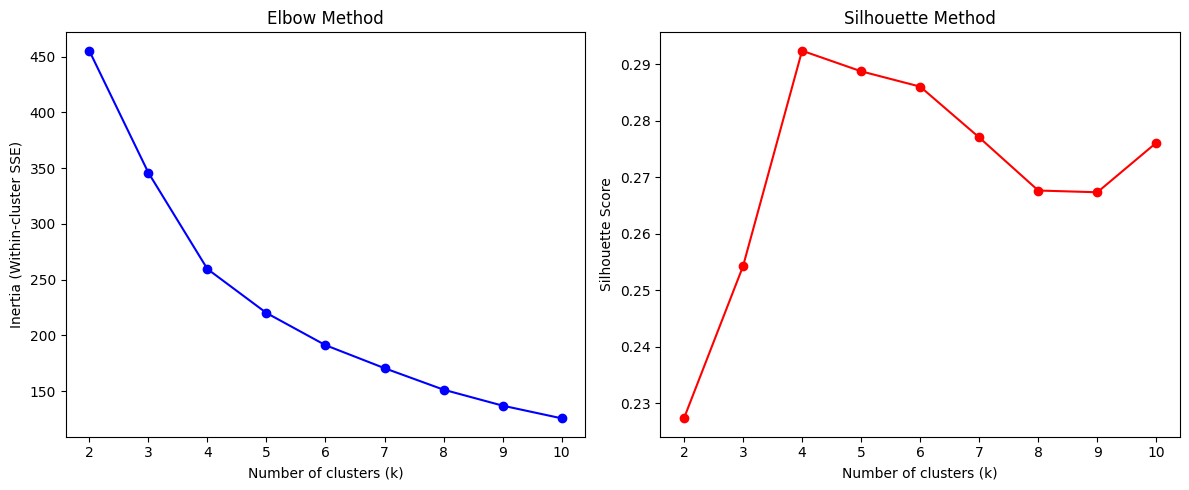

Best k based on Silhouette Score: 4
Max Silhouette Score: 0.2924042893050373
     Air_Pollution_Index  CO2_Emissions (in MT)  Industrial_Waste (in tons)  \
191               153.11                  17.28                    71534.45   
166               189.66                  28.42                     6950.89   
66                 70.95                  15.71                    70581.94   
68                185.93                  38.58                    10441.04   
59                276.96                  18.13                    57337.43   

     Cluster  
191        2  
166        0  
66         1  
68         0  
59         2  


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume your dataframe is df and pick features relevant for clustering
features = ["Air_Pollution_Index", "CO2_Emissions (in MT)", "Industrial_Waste (in tons)"]
X = df[features]

# Scale features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Elbow method
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method")

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")

plt.tight_layout()
plt.show()

# Step 2: Choose k based on the plots
# For automation, let's pick k with max silhouette score
best_k = K[silhouette.index(max(silhouette))]
print("Best k based on Silhouette Score:", best_k)
print("Max Silhouette Score:", max(silhouette))
# Step 3: Final clustering
final_kmeans = KMeans(n_clusters=best_k, random_state=21)
df['Cluster'] = final_kmeans.fit_predict(X_scaled)

print(df[['Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)', 'Cluster']].head())


In [23]:
df_new['Country'] = df['Country']
df_new

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Country
191,153.11,31.79,20.91,71534.45,111.74,17.28,8.46,43574.90,12.73,2.32,62577.51,Cuba
166,189.66,35.98,99.85,6950.89,160.95,28.42,45.66,34597.71,2.41,3.43,27549.90,Honduras
66,70.95,106.62,149.23,70581.94,22.78,15.71,11.25,20856.81,11.38,5.27,29427.62,Pitcairn Islands
68,185.93,196.48,112.95,10441.04,392.11,38.58,38.97,34432.23,19.74,5.39,12249.01,Iran
59,276.96,88.33,63.42,57337.43,22.84,18.13,35.85,26237.64,12.13,5.52,26014.06,Zimbabwe
...,...,...,...,...,...,...,...,...,...,...,...,...
109,221.14,196.49,25.03,70089.18,130.40,39.33,29.99,48981.39,8.55,195.63,3262.70,Gibraltar
44,275.50,161.90,68.83,94391.44,100.23,36.73,20.40,26799.02,0.64,195.64,4361.33,Kyrgyz Republic
185,114.45,111.88,121.19,48981.55,304.60,35.53,34.53,36190.09,14.21,197.69,47679.79,Western Sahara
102,245.78,100.00,57.38,34280.65,324.28,17.62,33.13,3588.18,8.67,198.76,30311.55,Switzerland


In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import plotly.express as px

# Pollution Index
df_new['Pollution_Index'] = df_new['Water_Pollution_Index'] + df_new['Air_Pollution_Index'] + df_new['Soil_Pollution_Index']
X = df_new[['Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=21, n_init=10)
df_new['Cluster'] = kmeans.fit_predict(X_scaled)


fig = px.scatter_3d(x=df_new['Pollution_Index'], y=df_new['CO2_Emissions (in MT)'], z=df_new['Industrial_Waste (in tons)'],
    color=df_new['Cluster'],
    hover_name=df_new['Country'],
    labels={
        "x": "Pollution_Index",
        "y": "CO2_Emissions",
        "z": "Industrial_Waste"
    },
    opacity=0.8,
    size_max=5
)
fig.show()


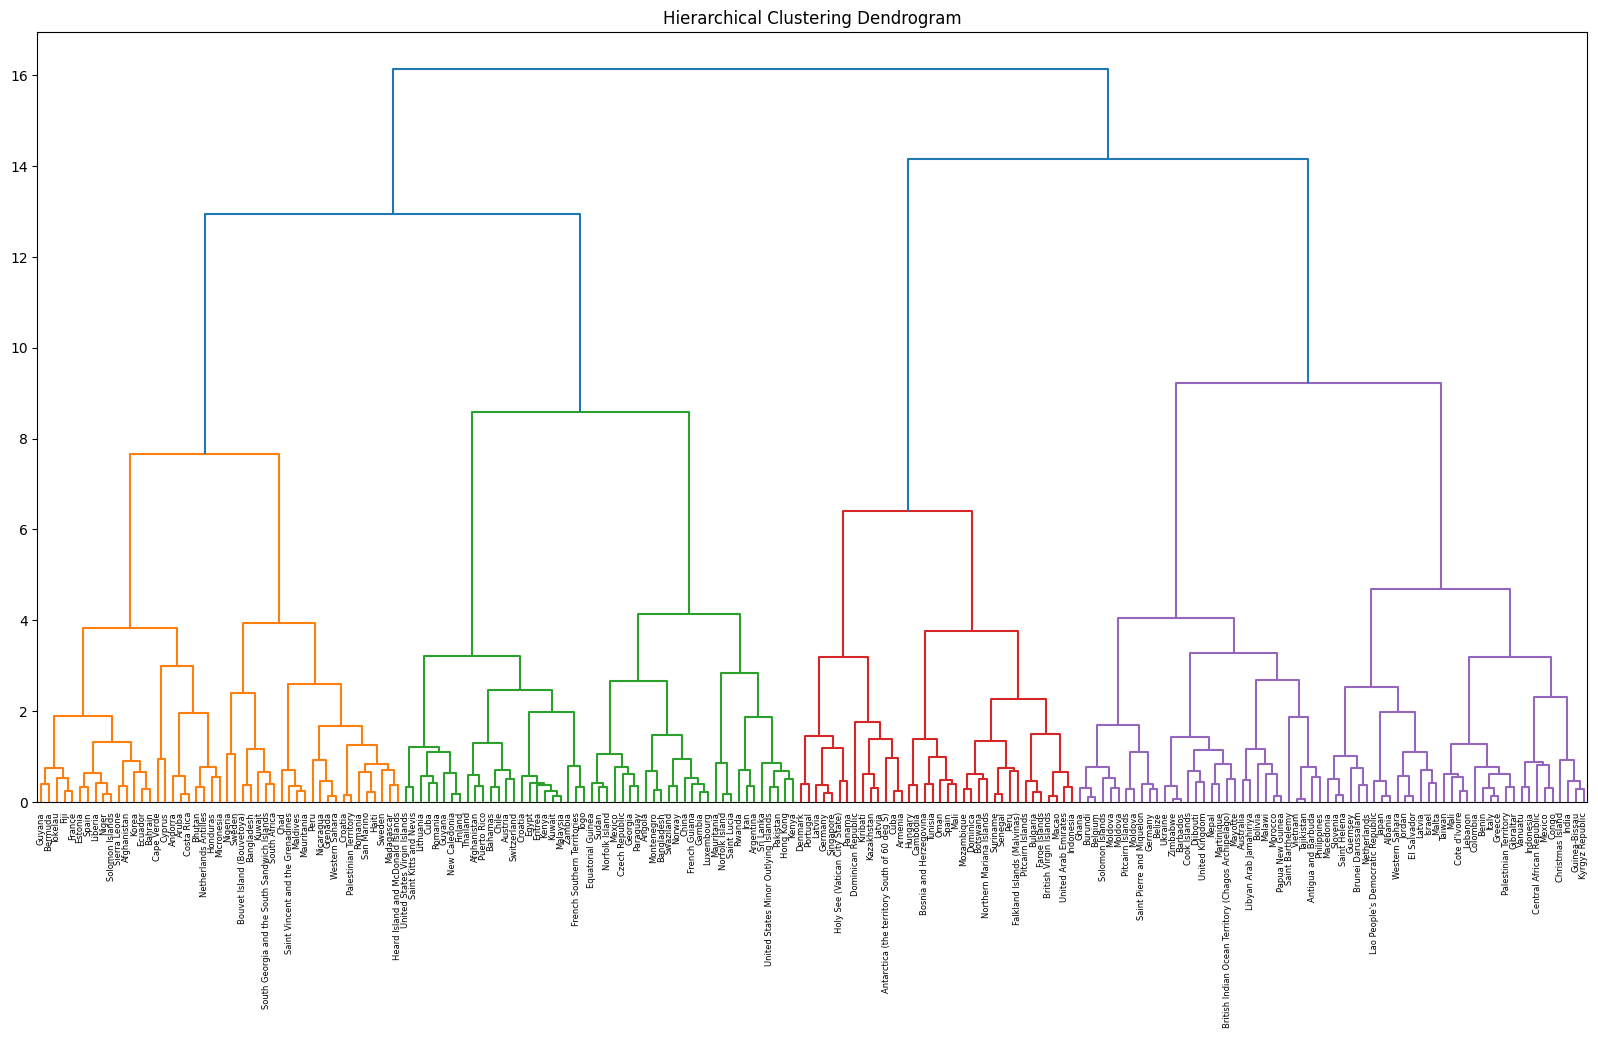

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Linkage matrix
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(20,10))
dendrogram(Z, labels=df_new['Country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_new['HierCluster'] = agg.fit_predict(X_scaled)

In [26]:
df_new[['Country', 'HierCluster', 'Cluster']].sort_values(by='HierCluster')

,Country,HierCluster,Cluster
71,Saint Pierre and Miquelon,0,2
104,Malta,0,2
149,Lebanon,0,2
64,Australia,0,2
84,Benin,0,2
...,...,...,...
97,Saint Vincent and the Grenadines,3,3
87,San Marino,3,3
90,Andorra,3,0
35,Liberia,3,3


Cluster mapping (Hierarchical → KMeans): [1 2 0 3]


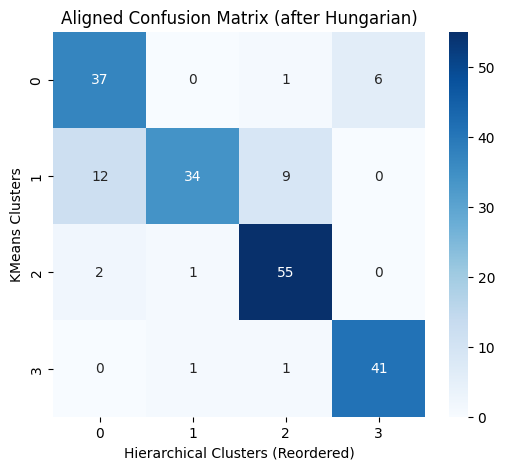

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns
import matplotlib.pyplot as plt

def aligned_confusion_matrix(labels1, labels2):
    cm = confusion_matrix(labels1, labels2)
    row_ind, col_ind = linear_sum_assignment(-cm)
    cm_aligned = cm[:, col_ind]
    return cm, cm_aligned, col_ind

cm, cm_aligned, mapping = aligned_confusion_matrix(df_new['Cluster'], df_new['HierCluster'])
print("Cluster mapping (Hierarchical → KMeans):", mapping)

# Plot aligned confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_aligned, annot=True, fmt="d", cmap="Blues")
plt.title("Aligned Confusion Matrix (after Hungarian)")
plt.xlabel("Hierarchical Clusters (Reordered)")
plt.ylabel("KMeans Clusters")
plt.show()


In [28]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df_new['Cluster'], df_new['HierCluster'])
nmi = normalized_mutual_info_score(df_new['Cluster'], df_new['HierCluster'])

print("ARI:", ari)
print("NMI:", nmi)


ARI: 0.6265725492740618
NMI: 0.6436059294490385


In [29]:
import tensorflow as tf

# Features and target
X = df_new[['Air_Pollution_Index', 'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)']]
y = df_new['Energy_Recovered (in GWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=0)

# Predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MSE: 22078.382287500426
MAE: 132.43736878967286
R²: 0.034364131955725186


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))


Linear Regression R²: 0.02938925310530416


In [31]:
from mlxtend.frequent_patterns import apriori, association_rules
df=pd.read_csv('Global_Pollution_Analysis.csv')

In [32]:
df.columns

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')

In [33]:
def bin_column(col, bins=3, labels=["Low", "Medium", "High"]):
    return pd.qcut(col, q=bins, labels=labels)

df_binned = pd.DataFrame()
df_binned['Country'] = df['Country']
df_binned['Year'] = df['Year']
df_binned['Air_Pollution'] = bin_column(df['Air_Pollution_Index'])
df_binned['Water_Pollution'] = bin_column(df['Water_Pollution_Index'])
df_binned['Soil_Pollution'] = bin_column(df['Soil_Pollution_Index'])
df_binned['Industrial_Waste'] = bin_column(df['Industrial_Waste (in tons)'])
df_binned['Energy_Recovered'] = bin_column(df['Energy_Recovered (in GWh)'])
df_binned['CO2_Emissions'] = bin_column(df['CO2_Emissions (in MT)'])
df_binned['Renewable_Energy'] = bin_column(df['Renewable_Energy (%)'])
df_binned['Plastic_Waste'] = bin_column(df['Plastic_Waste_Produced (in tons)'])
df_binned['Energy_Consumption'] = bin_column(df['Energy_Consumption_Per_Capita (in MWh)'])
df_binned['Population'] = bin_column(df['Population (in millions)'])
df_binned['GDP_Per_Capita'] = bin_column(df['GDP_Per_Capita (in USD)'])

In [34]:
df_binned

,Country,Year,Air_Pollution,Water_Pollution,Soil_Pollution,Industrial_Waste,Energy_Recovered,CO2_Emissions,Renewable_Energy,Plastic_Waste,Energy_Consumption,Population,GDP_Per_Capita
0,Hungary,2005,High,Medium,Low,High,Low,Low,High,High,High,Low,Low
1,Singapore,2001,Low,Low,High,Medium,High,Low,High,Medium,Low,High,Medium
2,Romania,2016,Low,Low,High,Medium,High,High,Low,Medium,High,Medium,High
3,Cook Islands,2018,High,Low,Medium,High,Low,Low,Low,Low,Low,Low,Low
4,Djibouti,2008,Medium,Medium,High,High,Low,Low,Medium,High,High,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,Low,Low,Low,Medium,Low,Low,Low,Low,Medium,Medium,Low
196,Bangladesh,2002,Low,Medium,Medium,High,Low,High,Low,High,High,Medium,High
197,Korea,2011,Low,High,Low,Low,Medium,High,High,Medium,High,High,Medium
198,Vanuatu,2002,High,Medium,High,High,Medium,Medium,Medium,Low,High,Low,Low


In [35]:
transaction_df = pd.get_dummies(df_binned.drop(columns=['Country','Year']))

In [36]:
transaction_df

,Air_Pollution_Low,Air_Pollution_Medium,Air_Pollution_High,Water_Pollution_Low,Water_Pollution_Medium,Water_Pollution_High,Soil_Pollution_Low,Soil_Pollution_Medium,Soil_Pollution_High,Industrial_Waste_Low,...,Plastic_Waste_High,Energy_Consumption_Low,Energy_Consumption_Medium,Energy_Consumption_High,Population_Low,Population_Medium,Population_High,GDP_Per_Capita_Low,GDP_Per_Capita_Medium,GDP_Per_Capita_High
0,False,False,True,False,True,False,True,False,False,False,...,True,False,False,True,True,False,False,True,False,False
1,True,False,False,True,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
2,True,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True
3,False,False,True,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
4,False,True,False,False,True,False,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,True,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
196,True,False,False,False,True,False,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True
197,True,False,False,False,False,True,True,False,False,True,...,False,False,False,True,False,False,True,False,True,False
198,False,False,True,False,True,False,False,False,True,False,...,False,False,False,True,True,False,False,True,False,False


In [37]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import KFold

min_support = 0.1
min_confidence = 0.5
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(transaction_df), 1):
    train, test = transaction_df.iloc[train_idx], transaction_df.iloc[test_idx]

    # Frequent itemsets from train
    freq_items = apriori(train, min_support=min_support, use_colnames=True)
    
    # Association rules from train
    rules = association_rules(freq_items, metric="confidence", min_threshold=min_confidence)

    print(f"\n=== Fold {fold} ===")
    for _, rule in rules.iterrows():
        antecedent = set(rule['antecedents'])
        consequent = set(rule['consequents'])

        # Compute support in test
        support_test = test[list(antecedent.union(consequent))].all(axis=1).mean()
        support_train = rule['support']

        # Compute confidence in test
        antecedent_support_test = test[list(antecedent)].all(axis=1).mean()
        if antecedent_support_test > 0:
            conf_test = support_test / antecedent_support_test
        else:
            conf_test = 0

        results.append({
            "fold": fold,
            "antecedent": tuple(antecedent),
            "consequent": tuple(consequent),
            "support_train": round(support_train, 3),
            "support_test": round(support_test, 3),
            "confidence_train": round(rule['confidence'], 3),
            "confidence_test": round(conf_test, 3),
            "lift_train": round(rule['lift'], 3)
        })

# Collect results into DataFrame
validation_df = pd.DataFrame(results)

# Show top rules that are consistent across folds
summary = validation_df.groupby(["antecedent", "consequent"]).agg({
    "support_train": "mean",
    "support_test": "mean",
    "confidence_train": "mean",
    "confidence_test": "mean",
    "lift_train": "mean"
}).reset_index()

print("\n=== Cross-Validated Rule Summary ===")
display(summary.head(15))



=== Fold 1 ===

=== Fold 2 ===

=== Fold 3 ===

=== Fold 4 ===

=== Fold 5 ===

=== Cross-Validated Rule Summary ===


,antecedent,consequent,support_train,support_test,confidence_train,confidence_test,lift_train
0,"(GDP_Per_Capita_Low,)","(Renewable_Energy_High,)",0.1630,0.12500,0.5000,0.33300,1.455
1,"(Industrial_Waste_High,)","(Water_Pollution_High,)",0.1750,0.05000,0.5280,0.14300,1.509
2,"(Industrial_Waste_Medium,)","(CO2_Emissions_Low,)",0.1750,0.05000,0.5190,0.16700,1.455
3,"(Plastic_Waste_Low,)","(Soil_Pollution_Low,)",0.1720,0.11250,0.5090,0.34500,1.524
4,"(Population_Low,)","(Water_Pollution_Low,)",0.1765,0.14375,0.5240,0.45050,1.530
5,"(Soil_Pollution_Low,)","(Plastic_Waste_Low,)",0.1750,0.10000,0.5380,0.26700,1.566
6,"(Water_Pollution_High,)","(Industrial_Waste_High,)",0.1750,0.05000,0.5000,0.18200,1.509
7,"(Water_Pollution_Low,)","(Population_Low,)",0.1765,0.14375,0.5165,0.47675,1.530
8,"(Water_Pollution_Medium,)","(CO2_Emissions_Low,)",0.1560,0.15000,0.5000,0.37500,1.481


Frequent Itemsets:
     support                  itemsets
0     0.335       (Air_Pollution_Low)
14    0.335   (Energy_Recovered_High)
32    0.335     (GDP_Per_Capita_High)
30    0.335      (GDP_Per_Capita_Low)
29    0.335         (Population_High)
27    0.335          (Population_Low)
24    0.335  (Energy_Consumption_Low)
23    0.335      (Plastic_Waste_High)
21    0.335       (Plastic_Waste_Low)
20    0.335   (Renewable_Energy_High)

Top Rules:
                   antecedents               consequents  antecedent support  \
0            (Population_Low)     (Water_Pollution_Low)               0.335   
1       (Water_Pollution_Low)          (Population_Low)               0.335   
2        (Soil_Pollution_Low)       (Plastic_Waste_Low)               0.335   
3         (Plastic_Waste_Low)      (Soil_Pollution_Low)               0.335   
5    (Water_Pollution_Medium)       (CO2_Emissions_Low)               0.330   
4         (CO2_Emissions_Low)  (Water_Pollution_Medium)               0.335

<Figure size 800x500 with 0 Axes>

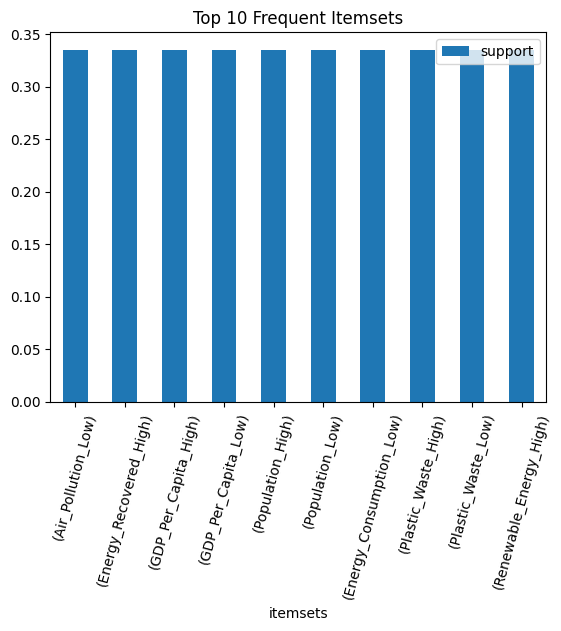

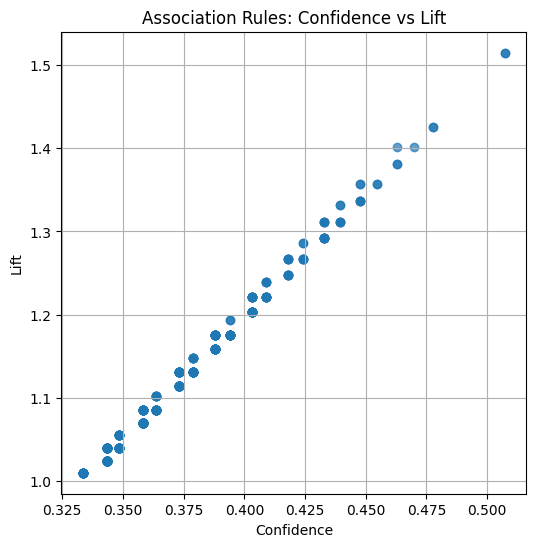

In [38]:
# -------------------
# 4. Apply Apriori
# -------------------
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)

# Sort by support
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)
print("Frequent Itemsets:\n", frequent_itemsets.head(10))

# -------------------
# 5. Association Rules
# -------------------
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by=["confidence","lift"], ascending=False)
print("\nTop Rules:\n", rules.head(10))

# -------------------
# 6. Visualization
# -------------------

# Top frequent itemsets
plt.figure(figsize=(8,5))
frequent_itemsets.head(10).plot.bar(x='itemsets', y='support')
plt.title("Top 10 Frequent Itemsets")
plt.xticks(rotation=75)
plt.show()

# Confidence vs Lift
plt.figure(figsize=(6,6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7)
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Association Rules: Confidence vs Lift")
plt.grid(True)
plt.show()